## Load modules

In [36]:
# -*- coding: utf-8 -*-
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.optimize
#from scipy.ndimage import gaussian_filter1d
import sys

## Parameters

In [37]:
date = '20211130'
dataNo = 2
scanNo = 2

## Data Preparation

In [38]:
path = r"./"+date
path_img = path + r"/data" + str('%03d' % dataNo) + "/raw"
path_scan = path + r"/scandir/Scan" + str('%03d' % scanNo) + '.txt'
path_param = path + r"/scandir/Parameters" + str('%03d' % scanNo) + '.txt'
scan_data = pd.read_csv(path_scan, delimiter='\t')

Analysis area
--

In [39]:
cx = 57
cy = 61
wx = 6
wy = 6
x0 = cx-wx; x1 = cx+wx
y0 = cy-wy; y1 = cy+wy


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

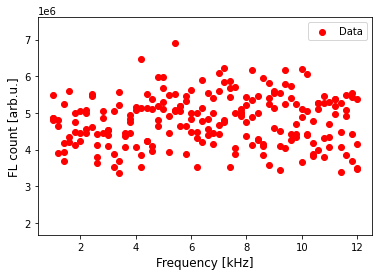

In [40]:
modfreq = scan_data['A0047: Lattice amp. modulation freq.']
flcount = scan_data['Total count1 @ ROI1 (arb. u.)']
#Fitting to experimental data
# para_ini=[1e6, 25000, 4000,4e6]
# def nonlinear_fit(x,a,b,c,d):
#     return a*np.exp(-2*(x-b)**2/c**2)+d

# param, cov=scipy.optimize.curve_fit(nonlinear_fit,modfreq,flcount,para_ini)

# list_x1=list(x for x in range(int(np.min(modfreq)),int(np.max(modfreq))))
# list_y1=[]
# for num in list_x1:
#     list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

# perr=np.sqrt(np.diag(cov))
# print("ax=",str(param[0]))
# print("bx=",str(param[1]))
# print("cx=",str(param[2]))
# print("cx error=",str(perr[1]))

plt.xlabel('Frequency [kHz]',fontsize=12)
plt.ylabel('FL count [arb.u.]',fontsize=12)
plt.ylim(np.min(flcount)*0.5,np.max(flcount)*1.1)
plt.scatter(modfreq*1.0e-3,flcount, label='Data',c="r")
# plt.plot(np.array(list_x1)*1.0e-3,list_y1, label='Fit, fc =%.02f (%.02f) [kHz]'%(param[1]*1.0e-3,perr[1]*1.0e-3))
plt.legend()
plt.xlabel


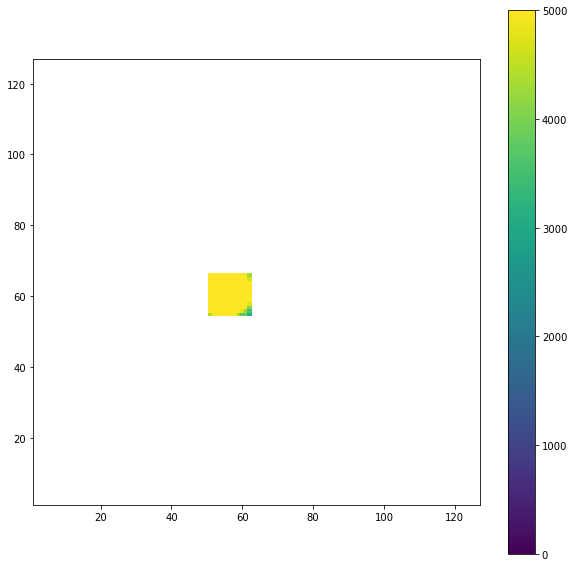

In [41]:
share = Path(path_img)
if share.exists():
    trans_files = list(Path(path_img).glob('seq*_trans001.tiff'))
    flat_files = list(Path(path_img).glob('seq*_flat001.tiff'))
    update_files = list(Path(path_img).glob('seq*_update001.tiff'))
else:
    print(No)

img_flat_ave =[]
img_trans_ave = []
for N in range(len(trans_files)):
    img_flat_ave += [np.array(Image.open(flat_files[N]))]
    img_trans_ave += [np.array(Image.open(trans_files[N]))]
img_flat_ave = np.average(img_flat_ave,axis=0)
img_trans_ave =np.average(img_trans_ave,axis=0) -img_flat_ave
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x=np.arange(x0,x1)
y=np.arange(y0,y1)
xmesh, ymesh = np.meshgrid(x,y)

mappable =ax.pcolormesh(xmesh,ymesh,img_trans_ave[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax.set_aspect('equal')
ax.set_xlim(1,127)
ax.set_ylim(1,127)
fig.colorbar(mappable)


plt.show()

In [42]:
img_trans_list =[]
for N in range(len(trans_files)):
    img_trans_temp = [np.array(Image.open(trans_files[N])) -img_flat_ave  ]
    img_trans_list +=[np.sum(img_trans_temp[0][y0:y1,x0:x1])/np.sum(img_trans_temp)]

a1= -0.15323798156412893
b1= 8516.482199996639
c1= 3016.089414207377
a2= -0.09763371090779649
b2= 5077.05901111176
c2= 1430.2959511875981
a3= -0.14554360647792533
b3= 7045.240935519362
c3= 490.8134522162963


(0.0, 15.0)

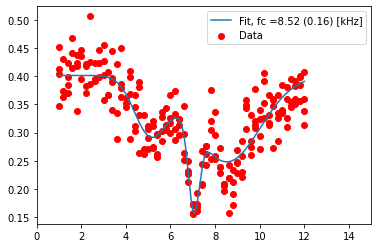

In [48]:
#Fitting to experimental data
# modfreq=modfreq[0:len(modfreq)-1]
# flcount=flcount[0:len(flcount)-1]

para_ini=[-0.05, 9000, 1000,-0.05, 5000, 1000,-0.05, 7000, 1000,0.07]
def nonlinear_fit(x,a1,b1,c1,a2,b2,c2,a3,b3,c3,d):
    return a1*np.exp(-2*(x-b1)**2/c1**2)+a2*np.exp(-2*(x-b2)**2/c2**2)+a3*np.exp(-2*(x-b3)**2/c3**2)+d

param, cov=scipy.optimize.curve_fit(nonlinear_fit,modfreq,img_trans_list,para_ini)

list_x1=list(x for x in range(int(np.min(modfreq)),int(np.max(modfreq))))
list_y1=[]
for num in list_x1:
    list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3]*np.exp(-2*(num-param[4])**2/param[5]**2)+param[6]*np.exp(-2*(num-param[7])**2/param[8]**2)+param[9])

perr=np.sqrt(np.diag(cov))
print("a1=",str(param[0]))
print("b1=",str(param[1]))
print("c1=",str(param[2]))
print("a2=",str(param[3]))
print("b2=",str(param[4]))
print("c2=",str(param[5]))
print("a3=",str(param[6]))
print("b3=",str(param[7]))
print("c3=",str(param[8]))

# para_ini=[-0.01, 10000, 5000,0.07]
# # modfreq=modfreq[0:len(modfreq)-1]
# def nonlinear_fit(x,a1,b1,c1,d):
#     return a1*np.exp(-2*(x-b1)**2/c1**2)+d

# param, cov=scipy.optimize.curve_fit(nonlinear_fit,modfreq,img_trans_list,para_ini)

# list_x1=list(x for x in range(int(np.min(modfreq)),int(np.max(modfreq))))
# list_y1=[]
# for num in list_x1:
#     list_y1.append(param[0]*np.exp(-2*(num-param[1])**2/param[2]**2)+param[3])

# perr=np.sqrt(np.diag(cov))
# print("a1=",str(param[0]))
# print("b1=",str(param[1]))
# print("c1=",str(param[2]))
plt.scatter(modfreq*1.0e-3,img_trans_list, label='Data',c="r")
plt.plot(np.array(list_x1)*1.0e-3,list_y1, label='Fit, fc =%.02f (%.02f) [kHz]'%(param[1]*1.0e-3,perr[1]*1.0e-3))
plt.legend()
plt.xlim(0,15)

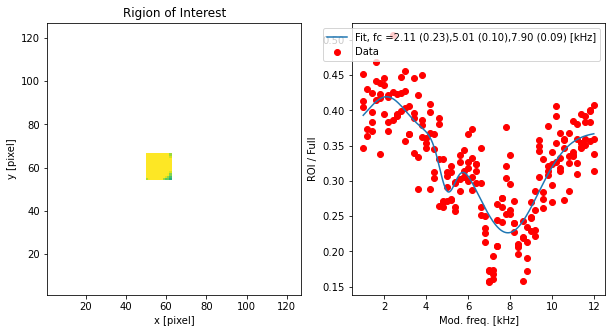

In [44]:
fig =plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(1,2,1)
ax1.pcolormesh(xmesh,ymesh,img_trans_ave[y0:y1,x0:x1], vmin=0, vmax=5000, shading='auto')
ax1.set_xlim(1,127)
ax1.set_ylim(1,127)
# ax1.set_aspect(1.)
ax1.set_xlabel('x [pixel]')
ax1.set_ylabel('y [pixel]')
ax1.set_title('Rigion of Interest')

# ax2 = fig.add_subplot(2,2,2)
# ax2.set_xlabel('Mod. freq. [kHz]',fontsize=12)
# ax2.set_ylabel('FL count [arb.u.]',fontsize=12)
# ax2.set_ylim(np.min(flcount)*0.5,np.max(flcount)*1.1)
# ax2.scatter(modfreq*1.0e-3,flcount, label='Data',c="r")
# # ax2.plot(np.array(list_x1)*1.0e-3,list_y1, label='Fit, fc =%.02f (%.02f) [kHz]'%(param[1]*1.0e-3,perr[1]*1.0e-3))
# ax2.legend()

ax3 = fig.add_subplot(1,2,2)
ax3.scatter(modfreq*1.0e-3,img_trans_list, label='Data',c="r")
ax3.plot(np.array(list_x1)*1.0e-3,list_y1, label='Fit, fc =%.02f (%.02f),%.02f (%.02f),%.02f (%.02f) [kHz]'%(param[1]*1.0e-3,perr[1]*1.0e-3,param[4]*1.0e-3,perr[4]*1.0e-3,param[7]*1.0e-3,perr[7]*1.0e-3))
ax3.set_xlabel('Mod. freq. [kHz]')
ax3.set_ylabel('ROI / Full')
ax3.legend()



C:\Users\Lab\anaconda3\envs\PYtest\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Lab\anaconda3\envs\PYtest\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


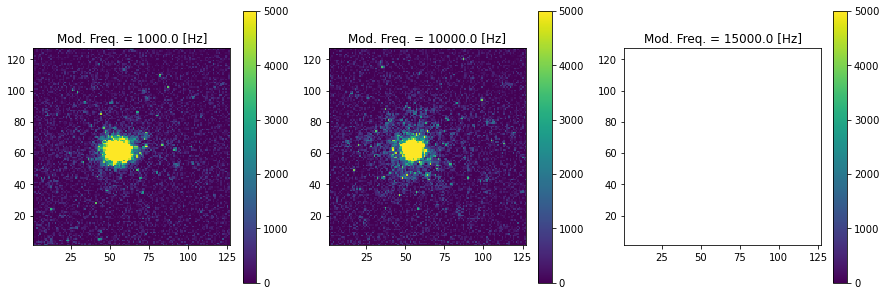

In [45]:
modfreq_sample1 = 1000 #[Hz]
modfreq_sample2 = 10000 #[Hz]
modfreq_sample3 = 15000 #[Hz]
# modfreq_sample4 = 15000 #[Hz]
img_trans_sample1 = []
img_trans_sample2 = []
img_trans_sample3 = []
for N in range(len(trans_files)):
    if modfreq[N] == modfreq_sample1:
        img_trans_sample1 += [np.array(Image.open(trans_files[N]))]
    elif modfreq[N] == modfreq_sample2:
        img_trans_sample2 += [np.array(Image.open(trans_files[N]))]
    elif modfreq[N] == modfreq_sample3:
        img_trans_sample3 += [np.array(Image.open(trans_files[N]))]
img_trans_sample1 = np.average(img_trans_sample1,axis=0) -img_flat_ave
img_trans_sample2 = np.average(img_trans_sample2,axis=0) -img_flat_ave
img_trans_sample3 = np.average(img_trans_sample3,axis=0) -img_flat_ave

fig =plt.figure(figsize=[15,5])
ax1 = fig.add_subplot(1,3,1)
mappable =ax1.pcolormesh(img_trans_sample1, vmin=0, vmax=5000, shading='auto')
ax1.set_aspect('equal')
ax1.set_xlim(1,127)
ax1.set_ylim(1,127)
ax1.set_title("Mod. Freq. = %.01f [Hz]"%(modfreq_sample1))
fig.colorbar(mappable)

ax2 = fig.add_subplot(1,3,2)
mappable =ax2.pcolormesh(img_trans_sample2, vmin=0, vmax=5000, shading='auto')
ax2.set_aspect('equal')
ax2.set_xlim(1,127)
ax2.set_ylim(1,127)
ax2.set_title("Mod. Freq. = %.01f [Hz]"%(modfreq_sample2))
fig.colorbar(mappable)

ax3 = fig.add_subplot(1,3,3)
mappable =ax3.pcolormesh(img_trans_sample3, vmin=0, vmax=5000, shading='auto')
ax3.set_aspect('equal')
ax3.set_xlim(1,127)
ax3.set_ylim(1,127)
ax3.set_title("Mod. Freq. = %.01f [Hz]"%(modfreq_sample3))
fig.colorbar(mappable)
plt.show()

In [46]:
modfreq = scan_data['A0047: Lattice amp. modulation freq.']


In [47]:
modfreq

0      1000.0
1      1400.0
2      1800.0
3      2200.0
4      2600.0
        ...  
211    6000.0
212    5600.0
213    5200.0
214    4800.0
215    4400.0
Name: A0047: Lattice amp. modulation freq., Length: 216, dtype: float64